In [1]:
from sequence import *
import time

In [2]:
s1 = Sequence('AGCGCGATTATATAAGACGGACGGCTAAAG', Protein_Alphabet)
s2 = Sequence('AGCGGATATTTATATCGCACGACGACTACG', Protein_Alphabet)
s3 = Sequence('GGATCGATTATATAGCCTGGACGAGACATG', Protein_Alphabet)

dna = readSubstMatrix('dna.matrix', Protein_Alphabet)

In [3]:
start_time = time.time()
alns1s2 = alignGlobal(s1, s2, dna, -4)
end_time = time.time()
print("alignGlobal Elapsed time was %g seconds" % (end_time - start_time))

start_time = time.time()
alns1s2s3 = tripletAlignGlobal(s1, s2, s3, dna, -4)
end_time = time.time()
print("tripletAlignGlobal Elapsed time was %g seconds" % (end_time - start_time))

alignGlobal Elapsed time was 0.00296521 seconds
tripletAlignGlobal Elapsed time was 0.42586 seconds


In [4]:
s4 = Sequence('AGCGCGATTATATAAGACGGACGAGACGACAGCGCGATAGACGAGACGGACGAGACGACT', Protein_Alphabet)
s5 = Sequence('GGATCGATTATATAGCCTGGACGAGACATGGGATCGAAGACGACCTGGACGAGACATGAC', Protein_Alphabet)
s6 = Sequence('AGCGGATATTTATATCGCACGACGACTACGAGCGGAAGACGAGTTTCGCACGACACTACG', Protein_Alphabet)

start_time = time.time()
alns1s2s3 = tripletAlignGlobal(s4, s5, s6, dna, -4)
end_time = time.time()
print("tripletAlignGlobal Elapsed time was %g seconds" % (end_time - start_time))

tripletAlignGlobal Elapsed time was 3.27723 seconds


### The number of cells in the score matrix of 'tripletAlignGlobal', in terms of the sequence lengths. (Let N be the length of each sequence)

### matrix_size = (N+1)**3

## Part 2: Consensus sequences

In [5]:
seq1 = Sequence(name="Seq1", sequence="AGFDTVTTAISWSL-YLVTNPNVQKKIQ", alphabet=Protein_Alphabet, gappy=True)
seq2 = Sequence(name="Seq2", sequence="AGFDTITTAISWSL-YLVMNPRIQKKIQ", alphabet=Protein_Alphabet, gappy=True)
seq3 = Sequence(name="Seq3", sequence="AGFDTVT-A-SWSLMYLVMNPRVQRKIQ", alphabet=Protein_Alphabet, gappy=True)
seq4 = Sequence(name="Seq4", sequence="AGFDTVT-A-SWSLMYLVTNPRVQRKIQ", alphabet=Protein_Alphabet, gappy=True)
seq5 = Sequence(name="Seq5", sequence="AGFDTVT-AISWSLMYLVTNPGVQRKIQ", alphabet=Protein_Alphabet, gappy=True)

test_aln = Alignment([seq1, seq2, seq3, seq4, seq5])

print("My consensus:", test_aln.getConsensus())

My consensus: AGFDTVT-AISWSLMYLVTNPRVQRKIQ


In [6]:
eh_aln = readClustalFile('eh.aln', Protein_Alphabet)
print("My consensus:", eh_aln.getConsensus())

2
3
10
30
43
69
77
139
153
157
164
185
217
226
233
246
247
252
254
262
281
282
283
305
335
337
347
350
357
358
365
368
385
393
394
395
My consensus: MSA-----PS-------PFTVDIPDE-VDDLKRRLDLSR--PAT-E---EDLRYGPTLDWLKELAKGW---FDWRAVEDRLNSFPHYTVEIEGLSIHFLHLRSTRPDAIPLILLHGWPGSFLEFLKVIPLLTE---PETLAFHVVVPSLPGYAFSSPPPS-SGFGMEDTARVFDKLMTGLGY-DGYVAQGGDWGSIVARCLASLHPECKAVHLNFCPV--NPTTSL---LTEAEKAGLERGLAYLEKGSAYAVEQGTKPRTIGYALSDSPVGLLAWIGEKFLAWSD--LTRDEILTTVSLYWFTESIGTSFLPYRENFP---------------RIHKPFGLS-FPKELA-PPRSWVARTGNLVWYKDHPEGGHFAALERPDVFLE-LREFVEQV---


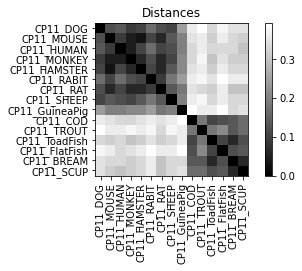

In [7]:
import numpy as np
# Matplotlib is a Python 2D plotting library which produces 
# high quality figures for displaying data
import matplotlib.pyplot as plt 

aln = readClustalFile('cyp1a1.aln', Protein_Alphabet)
d = aln.calcDistances('fractional')

fig, ax = plt.subplots()
plt.imshow(d, plt.cm.gray, interpolation='nearest')
plt.colorbar()
plt.yticks(np.arange(len(aln)), [s.name for s in aln])
plt.xticks(numpy.arange(len(aln)), [s.name for s in aln], rotation=90)
plt.subplots_adjust(bottom=0.35)
plt.savefig('cyp1a1_dist.png')
plt.title('Distances')
plt.show()